<a href="https://colab.research.google.com/github/Gituhin/Fractal-Dimension-Analysis-of-Time-series/blob/main/Fractal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Tuhin Subhra De

**Mail ID:** tuhinsubhrade069@gmail.com

**Contact no.:** 9475338369

**Topic:** Fractal Dimension Analysis for compelexity of Signals

**Dataset Link:** [Click here](https://drive.google.com/file/d/1T0Ce4nX8hTItZeaQtAuV-2M3CXiuW8dS/view?usp=sharing)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Projects/advanced python intern test/intern_dataset.csv", parse_dates=['Time'])
print(data.head(6),"\n\n", data.tail(6))

                     Time       Signal1   Signal2 Label
0 2017-08-14 11:37:49.791  33668.091913  0.856726     A
1 2017-08-14 11:37:49.801  32564.903040  0.856705     A
2 2017-08-14 11:37:49.811  31454.043305  0.856683     A
3 2017-08-14 11:37:49.821  30335.387166  0.856659     A
4 2017-08-14 11:37:49.831  29207.142938  0.856634     A
5 2017-08-14 11:37:49.841  28066.378446  0.856607     A 

                           Time       Signal1   Signal2 Label
911994 2020-01-04 10:55:49.176  34674.522012  0.151402     C
911995 2020-01-04 10:55:49.186  34673.811155  0.151395     C
911996 2020-01-04 10:55:49.196  34672.951723  0.151385     C
911997 2020-01-04 10:55:49.206  34671.967555  0.151373     C
911998 2020-01-04 10:55:49.216  34670.877944  0.151359     C
911999 2020-01-04 10:55:49.226  34669.694865  0.151342     C


In [ ]:
print(data.info(), "\n\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Time     912000 non-null  datetime64[ns]
 1   Signal1  912000 non-null  float64       
 2   Signal2  912000 non-null  float64       
 3   Label    912000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 27.8+ MB
None 

              Signal1        Signal2
count  912000.000000  912000.000000
mean    31315.380483       0.398004
std     11700.734813       0.258119
min     -2934.328327       0.113841
25%     23851.958837       0.162522
50%     30650.812455       0.261210
75%     37933.966586       0.546605
max     67692.652022       1.356019


We observe that Signal 1 is more dispersed than Signal 2 due to more standard deviation in case of signal 1. There may be more outliers in Signal 1


---









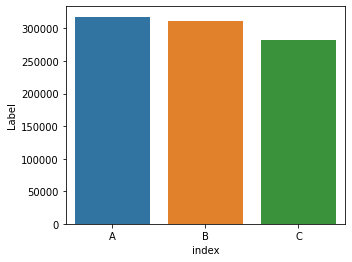

In [ ]:
label_nele=pd.DataFrame(data['Label'].value_counts()).reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x=label_nele['index'], y=label_nele['Label'])

The number of data elements(rows) associated with each class is almost same.

Text(0.5, 1.0, 'signal2 average by class')

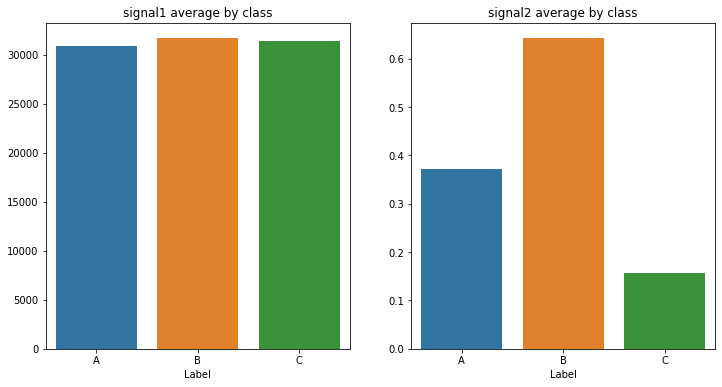

In [ ]:
avg_sig1=data.groupby('Label')['Signal1'].mean()
avg_sig2=data.groupby('Label')['Signal2'].mean()
fig, axes = plt.subplots(nrows=1 ,ncols= 2,  figsize=(12, 6))

sns.barplot(ax=axes[0], x=avg_sig1.index, y=avg_sig1.values)
axes[0].set_title('signal1 average by class')

sns.barplot(ax=axes[1], x=avg_sig2.index, y=avg_sig2.values)
axes[1].set_title('signal2 average by class')


**Signal1:**
>We see the average value of the magnitude of signals associated with each A, B and C are almost same

**Signal2:**
>We observe class B has highest average magniude of signal associated with it followed by class A and then C.



In [ ]:
#Segregating the dataset by classes for individual analysis
data_A=data.loc[data["Label"]=="A"]
data_B=data.loc[data["Label"]=="B"]
data_C=data.loc[data["Label"]=="C"]
data_list={'A': data_A, 'B':data_B, 'C':data_C}#storing them in a dicitionary with proper keys
print("A:", data_A.describe(),'\n B:\n' , data_B.describe(), '\n C:\n', data_C.describe())

A:              Signal1        Signal2
count  318000.000000  318000.000000
mean    30900.207581       0.371612
std     14506.810996       0.157220
min     -2934.328327       0.233280
25%     21734.338074       0.246235
50%     29487.372205       0.253411
75%     39622.622509       0.491799
max     67692.652022       0.869459 
 B:
              Signal1        Signal2
count  312000.000000  312000.000000
mean    31693.976570       0.642296
std     10693.240850       0.238301
min     -1110.867137       0.318764
25%     23601.692942       0.410278
50%     30673.198029       0.635220
75%     39587.013733       0.801793
max     67099.772581       1.356019 
 C:
              Signal1        Signal2
count  282000.000000  282000.000000
mean    31364.681913       0.157482
std      8864.887863       0.010161
min      4111.708945       0.113841
25%     26554.522791       0.153013
50%     31115.234365       0.160206
75%     34585.075333       0.162071
max     65678.562412       0.223524


Line plot of signals associated with Class A

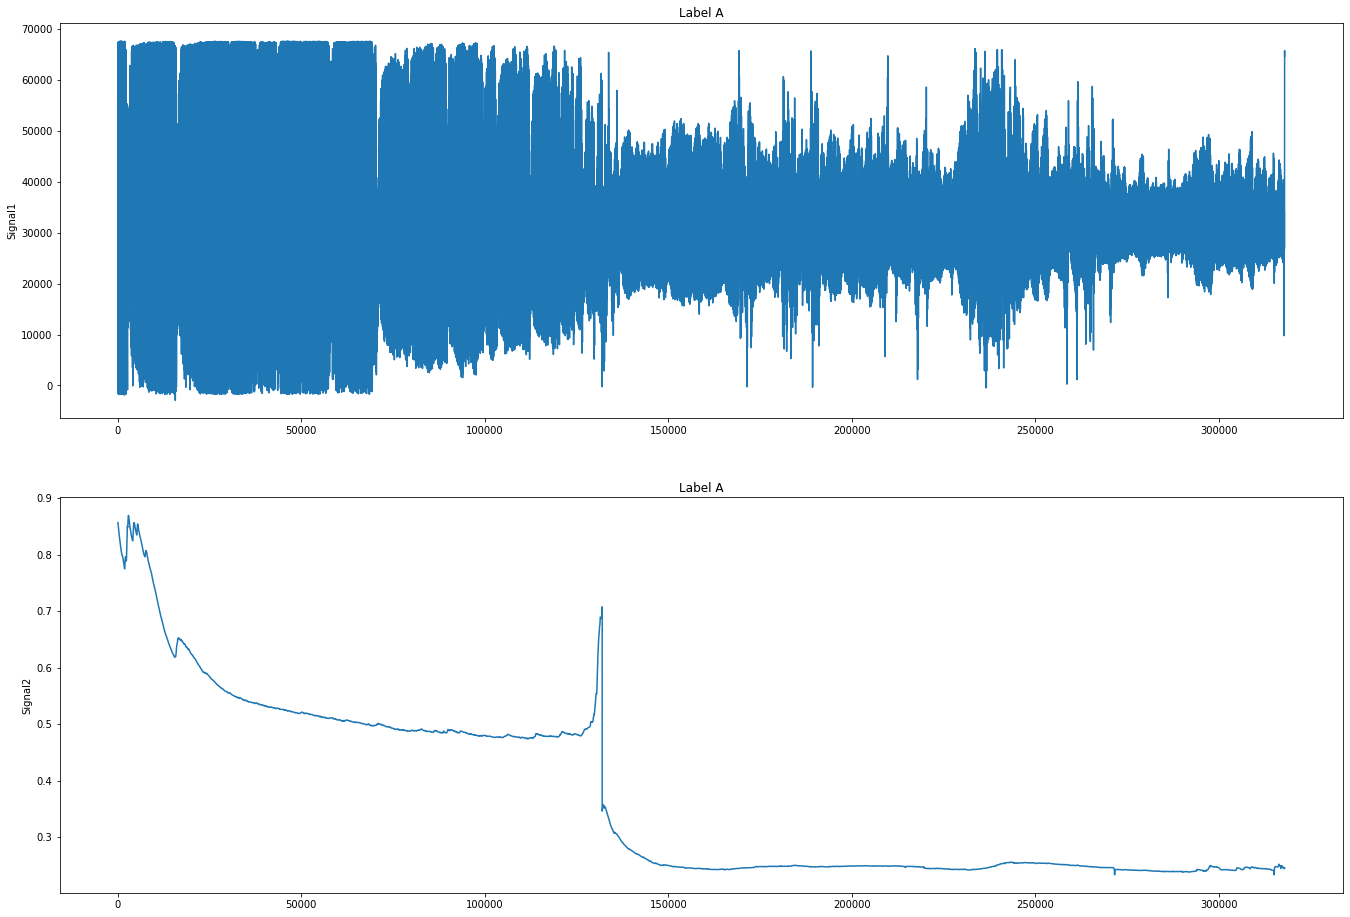

In [ ]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_A), 1), y=data_A['Signal1'])
axes[0].set_title("Label A(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_A), 1), y=data_A['Signal2'])
axes[1].set_title("Label A(signal2)")
plt.show()

Signals associated with Class B

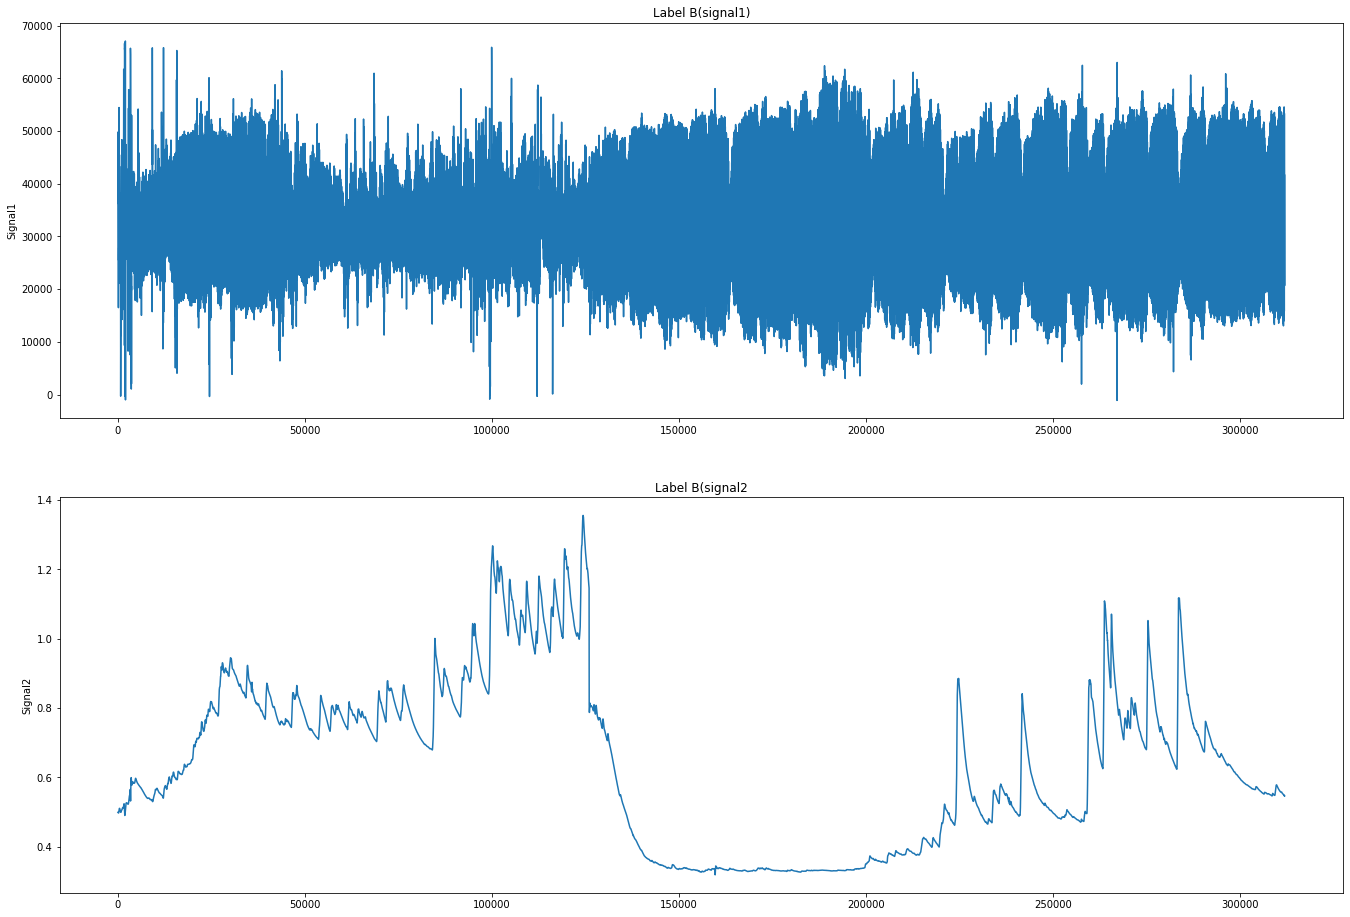

In [ ]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_B), 1), y=data_B['Signal1'])
axes[0].set_title("Label B(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_B), 1), y=data_B['Signal2'])
axes[1].set_title("Label B(signal2)")
plt.show()

Signals associated with Class C

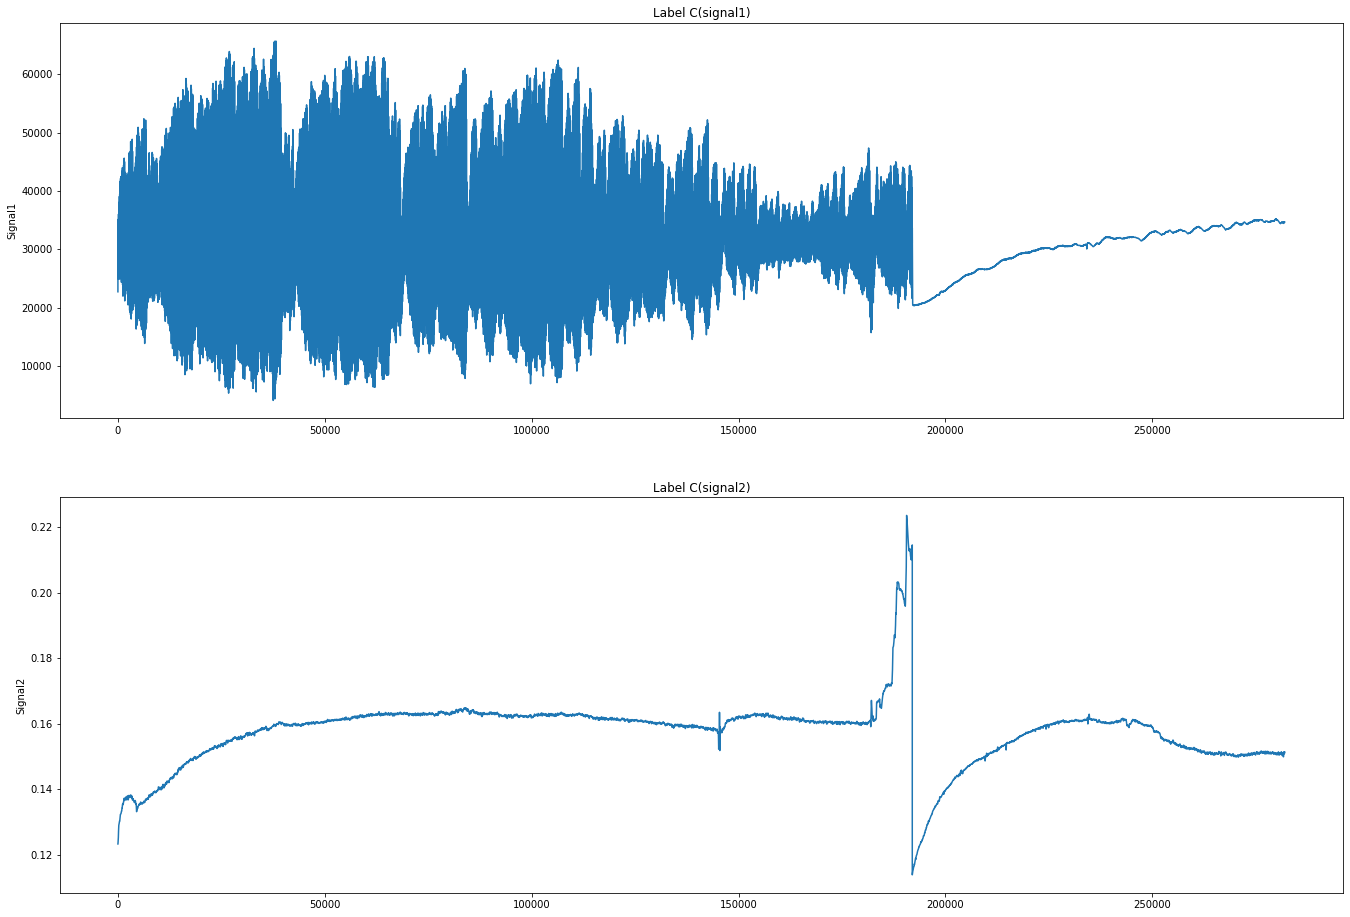

In [ ]:
fig, axes=plt.subplots(ncols=1, nrows=2, figsize=(23,16))
sns.lineplot(ax=axes[0], x=np.arange(0, len(data_C), 1), y=data_C['Signal1'])
axes[0].set_title("Label C(signal1)")
sns.lineplot(ax=axes[1], x=np.arange(0, len(data_C), 1), y=data_C['Signal2'])
axes[1].set_title("Label C(signal2)")
plt.show()

# Using Hurst Exponent:

In [ ]:
!pip install hurst
from hurst import compute_Hc

Hurst exponents:
For A


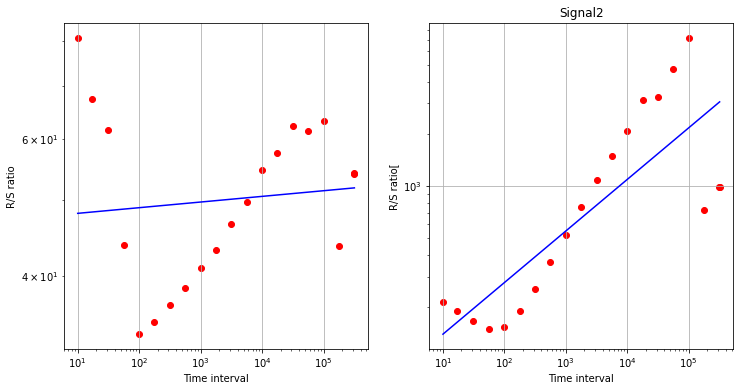

Signal: 0.007246388937073725
signal2: 0.29820429992587955 
Average Exponent: 0.15272534443147665 


For B


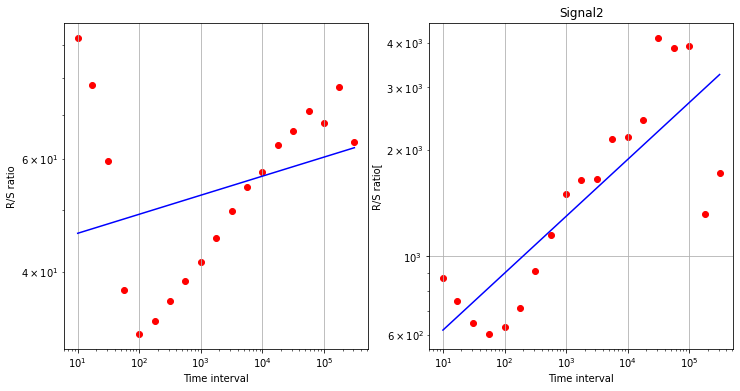

Signal: 0.029550640035149907
signal2: 0.160496577720737 
Average Exponent: 0.09502360887794345 


For C


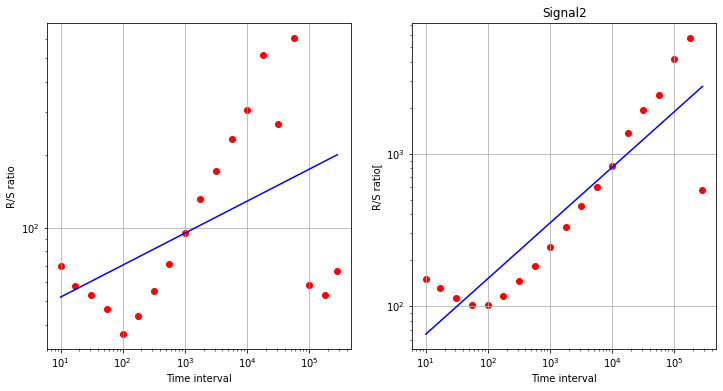

Signal: 0.13150856195816116
signal2: 0.36472637994907464 
Average Exponent: 0.2481174709536179 




In [ ]:
print("Hurst exponents:")
for d in data_list.items():
  series1=list(d[1].Signal1)
  series2=list(d[1].Signal2)
  H1, c1, val1=compute_Hc(series1) #calculates the hurst Exponent H1 and H2 for signal1  and signal2
  H2, c2, val2=compute_Hc(series2)

  print("For", d[0])

  fig, axes = plt.subplots(nrows=1 ,ncols= 2,  figsize=(12, 6))
  axes[0].plot(val1[0], c1*val1[0]**H1, color="blue") #plotting the batch size VS the Hurst exponent relation equation
  axes[0].scatter(val1[0], val1[1], color="red")      # the more the deviation, more is the signal complex
  axes[1].set_title("Signal1")
  axes[0].set_xscale('log')
  axes[0].set_yscale('log')
  axes[0].set_xlabel('Time interval')
  axes[0].set_ylabel('R/S ratio')
  axes[0].grid(True)

  axes[1].plot(val2[0], c2*val2[0]**H2, color="blue")
  axes[1].scatter(val2[0], val2[1], color="red")
  axes[1].set_title("Signal2")
  axes[1].set_xscale('log')
  axes[1].set_yscale('log')
  axes[1].set_xlabel('Time interval')
  axes[1].set_ylabel('R/S ratio[')
  axes[1].grid(True)

  plt.show()
  print("Signal:", H1)
  print("signal2:", H2, "\nAverage Exponent:", 0.5*(H1+H2), '\n\n')

**RESULT:** We observe Class B has lowest average Hurst exponent, hence more anti-persistant than other classes. Class B is most complex.
>Complexity: B>A>C

#Detrended Fluctuation Analysis(DFA)

In [ ]:
#credits github/dokato/dfa
import scipy.signal as ss

# detrended fluctuation analysis function

def calc_rms(x, scale):
    """
    windowed Root Mean Square (RMS) with linear detrending.
    
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale* : int
        length of the window in which RMS will be calculaed
    Returns:
    --------
      *rms* : numpy.array
        RMS data in each window with length len(x)//scale
    """
    # making an array with data divided in windows
    shape = (x.shape[0]//scale, scale)
    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    # vector of x-axis points to regression
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        # detrending and computing RMS of each window
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[5,9], scale_dens=0.25, show=False):
    """
    Detrended Fluctuation Analysis - measures power law scaling coefficient
    of the given signal *x*.
    More details about the algorithm you can find e.g. here:
    Hardstone, R. et al. Detrended fluctuation analysis: A scale-free 
    view on neuronal oscillations, (2012).
        Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale_lim* = [5,9] : list of length 2 
        boundaries of the scale, where scale means windows among which RMS
        is calculated. Numbers from list are exponents of 2 to the power
        of X, eg. [5,9] is in fact [2**5, 2**9].
        You can think of it that if your signal is sampled with F_s = 128 Hz,
        then the lowest considered scale would be 2**5/128 = 32/128 = 0.25,
        so 250 ms.
      *scale_dens* = 0.25 : float
        density of scale divisions, eg. for 0.25 we get 2**[5, 5.25, 5.5, ... ] 
      *show* = False
        if True it shows matplotlib log-log plot.
    Returns:
    --------
      *scales* : numpy.array
        vector of scales (x axis)
      *fluct* : numpy.array
        fluctuation function values (y axis)
      *alpha* : float
        estimation of DFA exponent
    """
     # cumulative sum of data with substracted offset
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
    fluct = np.zeros(len(scales))
    # computing RMS for each window
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))
    # fitting a line to rms data
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
    return scales, fluct, coeff[0]

The alpha values of DFA for the labels:

For A 



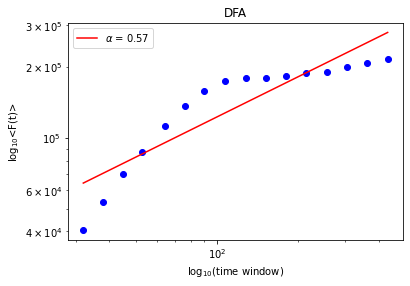

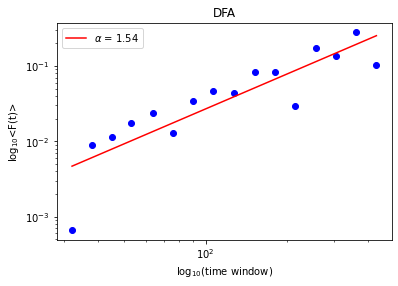

signal1:(alpha) 0.5669822676625104
signal2:(alpha) 1.535067561051201 
Average alpha: 1.0510249143568557 


For B 



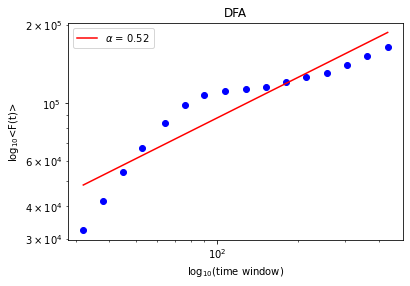

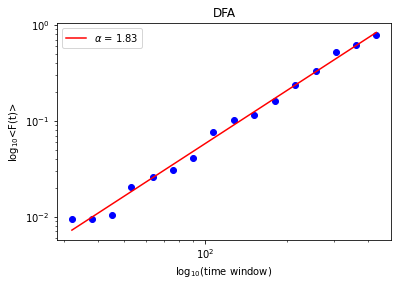

signal1:(alpha) 0.5208740835595763
signal2:(alpha) 1.8267976212461443 
Average alpha: 1.1738358524028603 


For C 



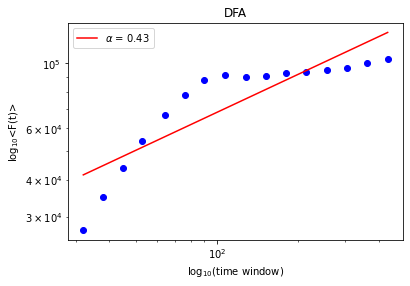

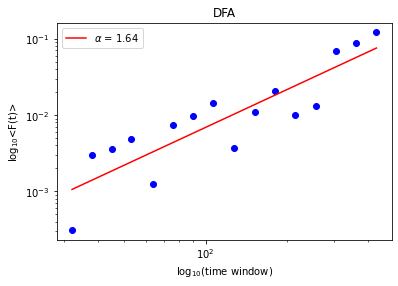

signal1:(alpha) 0.43018283949558467
signal2:(alpha) 1.6400877531797462 
Average alpha: 1.0351352963376654 




In [ ]:
print("The alpha values of DFA for the labels:\n")
for d in data_list.items():
  print("For", d[0], '\n')
  series1=d[1].Signal1.values 
  series2=d[1].Signal2.values
  scales1, fluct1, alpha1 = dfa(series1, show=True)
  print("\n")
  scales2, fluct2, alpha2 = dfa(series2, show=True)
  print("signal1:(alpha)", alpha1)
  print("signal2:(alpha)", alpha2,"\nAverage alpha:", 0.5*(alpha1+alpha2), '\n\n')

**RESULT:** We observe that Class C has least average alpha value for DFA. Hence it is most complex.
>Complexity: C>A>B

#Entropy analysis and Higuchi Fractal Dimension

In [ ]:
!pip install antropy
#credits github/raphaelvallat/antropy
import antropy as ant

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for antropy: filename=antropy-0.1.4-cp37-none-any.whl size=16145 sha256=b200fc0f7f6c8dc453061d2c97663d32c5a497faffe54508aa3e751590117096
  Stored in directory: /root/.cache/pip/wheels/ea/18/dd/bc916fbf8fd484b9722551f73a0314f0aacfc3c1cdf5f4b2ca
Successfully built antropy


In [ ]:
print("Higuchi fractal dimensions and Approx. Entropy")
for d in data_list.items():
  series1=d[1].Signal1.values 
  series2=d[1].Signal2.values
  hfd1=ant.higuchi_fd(series1)
  hfd2=ant.higuchi_fd(series2)
  apen1=ant.app_entropy(series1)
  apen2=ant.app_entropy(series2)
  print("For", d[0], '\nhiguchi FD(signal1):', hfd1)
  print("Approximate entropy(signal1):", apen1)
  print("higuchi FD(signal2): ", hfd2)
  print("Approximate entropy(signal2):", apen2)
  print("Average Higuchi FD=", 0.5*(hfd1+hfd2), " Average Approx. Entropy=", 0.5*(apen1+apen2), '\n\n')

Higuchi fractal dimensions and Approx. Entropy
For A 
higuchi FD(signal1): 1.0141546770804286
Approximate entropy(signal1): 0.28566703287662687
higuchi FD(signal2):  1.0017484530637124
Approximate entropy(signal2): 0.00011288918481411336
Average Higuchi FD= 1.0079515650720705  Average Approx. Entropy= 0.1428899610307205 


For B 
higuchi FD(signal1): 1.0211527971538752
Approximate entropy(signal1): 0.34839418110953524
higuchi FD(signal2):  1.000246314778308
Approximate entropy(signal2): 0.0008917483339825338
Average Higuchi FD= 1.0106995559660916  Average Approx. Entropy= 0.1746429647217589 


For C 
higuchi FD(signal1): 1.0237723442306055
Approximate entropy(signal1): 0.27430878278423476
higuchi FD(signal2):  1.003271681332192
Approximate entropy(signal2): 0.0014159765394878843
Average Higuchi FD= 1.0135220127813986  Average Approx. Entropy= 0.13786237966186132 




**RESULT:** We observe by higuchi FD, Class C has most average value and by Approx Entropy, Class B has highest Average value, hence more irregularity and more complex it is to predict.

>Complexity(hfd): C>B>A

>Complexity(Approx. Ent): B>A>C

# All Results together:

**RESULT(HE):** We observe Class B has lowest average Hurst exponent, hence more anti-persistant than other classes. Class B is most complex.
>Complexity: B>A>C


---



**RESULT(DFA):** We observe that Class C has least average alpha value for DFA. Hence it is most complex.
>Complexity: C>A>B


---



**RESULT(Entropy and HFD):** We observe by higuchi FD, Class C has most average value and by Approx Entropy, Class B has highest Average value, hence more irregularity and more complex it is to predict.

>Complexity(hfd): C>B>A

>Complexity(Approx. Ent): B>A>C


---

**FINAL CONCLUSION:** As we can see both Hurst Exponent and Approximate Entropy analysis gives same result, so we go with Hurst Exponent above all to draw a full and final conclusion on class Complexities. We also have visual representation in case of Hurst Exponent analysis(which defines the long-term correlation among the data points with time) and Approx. Entropy defines irregularity in time series. 

Hence, final results:

Complexity order:  **B>A>C**;
where '>' defines greater than sign.


---


